<a href="https://colab.research.google.com/github/Maschenny0/ImageProject/blob/main/DiamondFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary modules

In [2]:
'''from zipfile import ZipFile
file_name = "images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()'''


'from zipfile import ZipFile\nfile_name = "images.zip"\nwith ZipFile(file_name,\'r\') as zip:\n  zip.extractall()'

In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data Preparation

In [6]:
X = []
Z = []
IMG_SIZE = 224
DIAMOND_CUSHION_DIR = 'images/cushion'
DIAMOND_EMERALD_DIR = 'images/emerald/'
DIAMOND_OVAL_DIR = 'images/oval/'
DIAMOND_PRINCESS_DIR = 'images/princess/'
DIAMOND_ROUND_DIR = 'images/round'

In [7]:
def assign_label(img, diamond_type):
    return diamond_type

In [8]:
#Getting Train Data
def make_train_data(diamond_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, diamond_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [9]:
make_train_data('cushion', DIAMOND_CUSHION_DIR)
print(len(X))

100%|██████████| 257/257 [00:00<00:00, 594.75it/s]

257


In [10]:
make_train_data('emerald', DIAMOND_EMERALD_DIR)
print(len(X))

100%|██████████| 240/240 [00:00<00:00, 613.57it/s]

497


In [11]:
make_train_data('oval', DIAMOND_OVAL_DIR)
print(len(X))

100%|██████████| 243/243 [00:00<00:00, 450.89it/s]

740


In [12]:
make_train_data('princess', DIAMOND_PRINCESS_DIR)
print(len(X))

100%|██████████| 251/251 [00:00<00:00, 412.32it/s]


991


In [13]:
make_train_data('round', DIAMOND_ROUND_DIR)
print(len(X))

100%|██████████| 253/253 [00:00<00:00, 438.88it/s]

1244


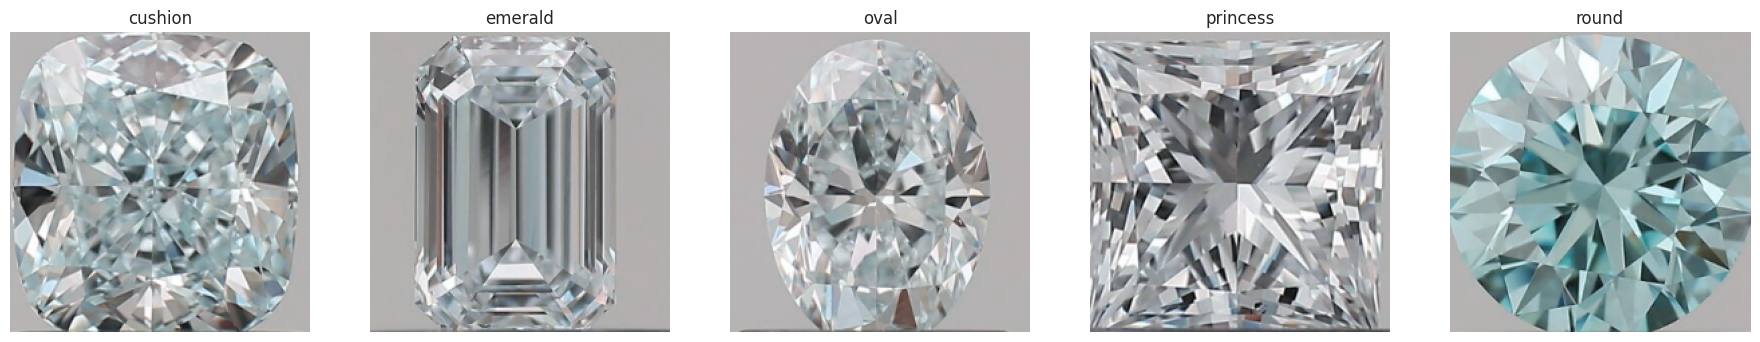

In [14]:
#plotting one of all flower types in data
plt.figure(figsize = (20,20))
for i in range(5):
    img = X[260*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(Z[260*i])

In [15]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 5)
X = np.array(X)
X = X/255

In [16]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

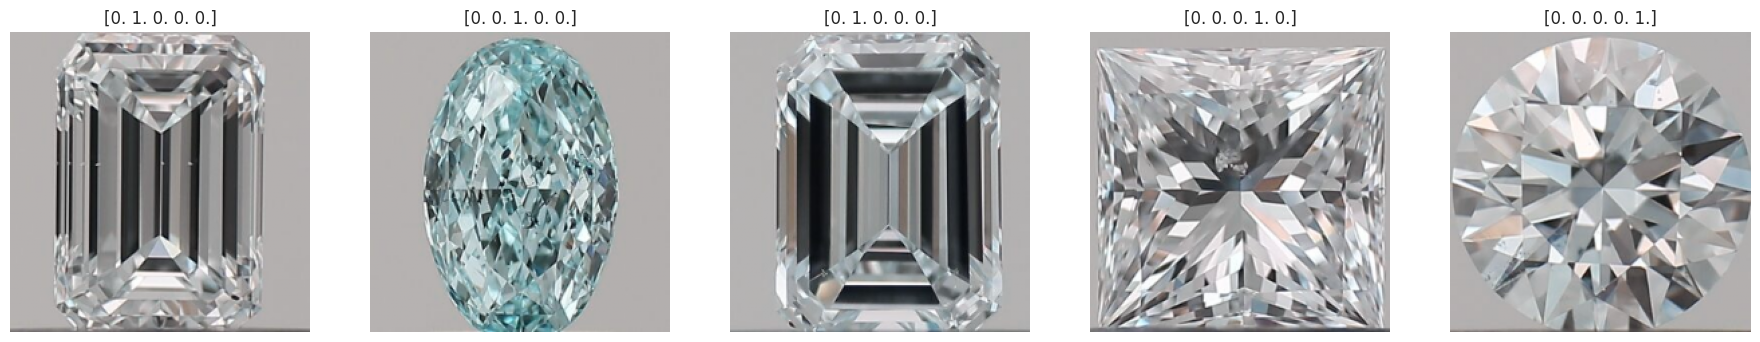

In [17]:
#Plotting random 5 images in train data
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[190*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[190*i])
plt.show()

In [18]:
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("======")
print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (995, 224, 224, 3)
y_train shape: (995, 5)
X_test shape: (249, 224, 224, 3)
y_test shape: (249, 5)


# Model Building

In [19]:
# # modelling starts using a CNN.
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=64,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=32,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# 2st Fully Connected Layer
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy']) #compile model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 256)    1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0

In [20]:
batch_size = 32
epochs = 100

red_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [21]:
#Create a data augmentation and apply it to x_train data to prevent over-fitting

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

# Training And Testing The Model

In [22]:

filepath = "keras_model.h5"

checkpoint = ModelCheckpoint(filepath, save_weights_only=False,
                             monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlyStop =  EarlyStopping(monitor='val_loss', mode='min', patience=30)
callbacks_list = [earlyStop, checkpoint]

History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_test, y_test),
                              verbose=1,
                              callbacks=callbacks_list)

Epoch 1/100
32/32 [==============================] - ETA: 0s - loss: 1.7574 - accuracy: 0.3960
Epoch 1: val_loss improved from inf to 2.21058, saving model to keras_model.h5
32/32 [==============================] - 44s 751ms/step - loss: 1.7574 - accuracy: 0.3960 - val_loss: 2.2106 - val_accuracy: 0.2048
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.9595 - accuracy: 0.6462
Epoch 2: val_loss did not improve from 2.21058
32/32 [==============================] - 21s 647ms/step - loss: 0.9595 - accuracy: 0.6462 - val_loss: 5.5412 - val_accuracy: 0.2088
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.6743 - accuracy: 0.7749
Epoch 3: val_loss did not improve from 2.21058
32/32 [==============================] - 21s 645ms/step - loss: 0.6743 - accuracy: 0.7749 - val_loss: 7.6697 - val_accuracy: 0.2088
Epoch 4/100
32/32 [==============================] - ETA: 0s - loss: 0.5169 - accuracy: 0.8281
Epoch 4: val_loss did not improve from 2.21058
32/3

In [23]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

8/8 [==============================] - 1s 62ms/step - loss: 0.0071 - accuracy: 1.0000
Test Accuracy: 100.00%


# Evaluating The Model

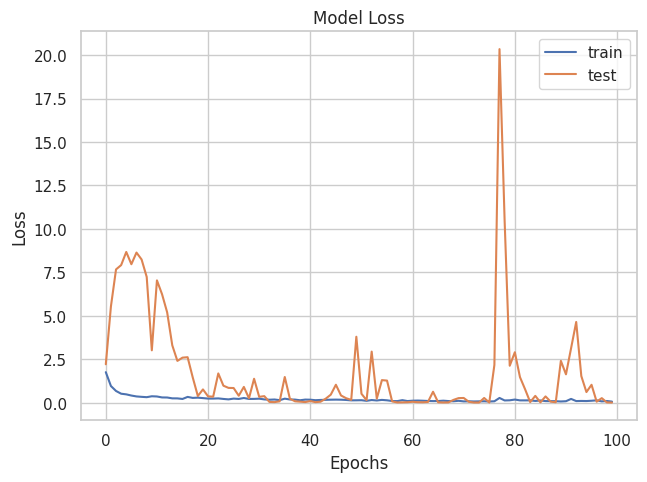

In [24]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

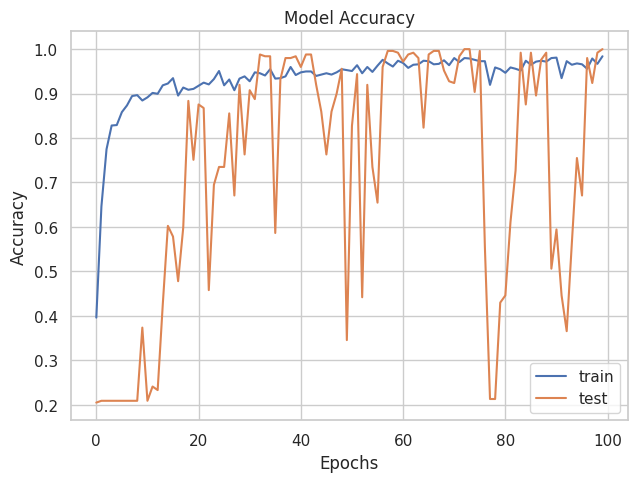

In [25]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [26]:
model.load_weights("keras_model.h5")

loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy:  0.9980
Testing Accuracy:  1.0000


8/8 [==============================] - 1s 69ms/step
Classification Report
              precision    recall  f1-score   support

     cushion       1.00      1.00      1.00        51
     emerald       1.00      1.00      1.00        52
        oval       1.00      1.00      1.00        52
    princess       1.00      1.00      1.00        41
       round       1.00      1.00      1.00        53

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249



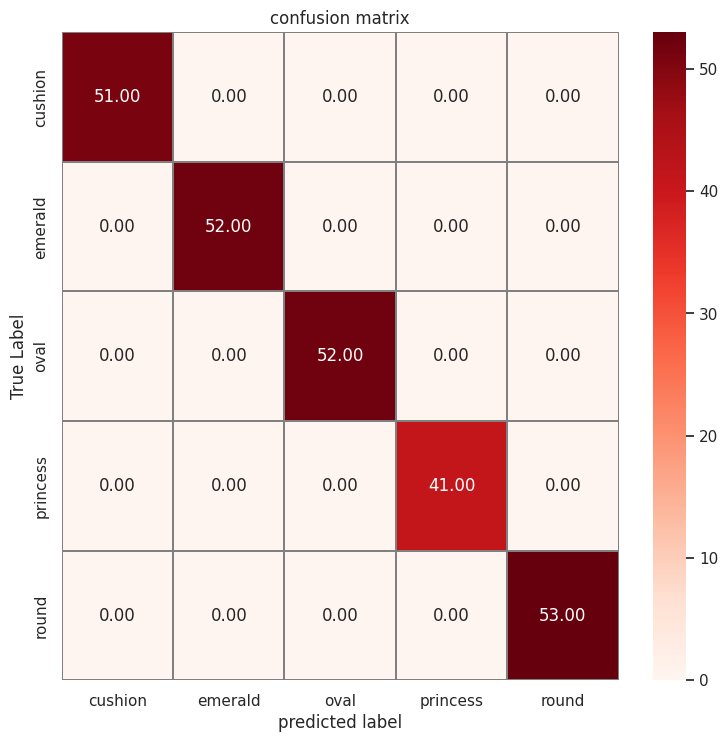

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
# demonstration of calculating metrics for a neural network model using sklearn
# Predict the values from the validation dataset

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
print('Classification Report')
target_names = ['cushion', 'emerald', 'oval', 'princess', 'round']
print(classification_report(Y_true, Y_pred_classes,target_names=target_names))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_mtx,cmap= "Reds", linecolor = 'gray' , linewidth = 0.01 , annot = True, fmt='.2f' , xticklabels = target_names , yticklabels = target_names)
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Visualizing Predictions

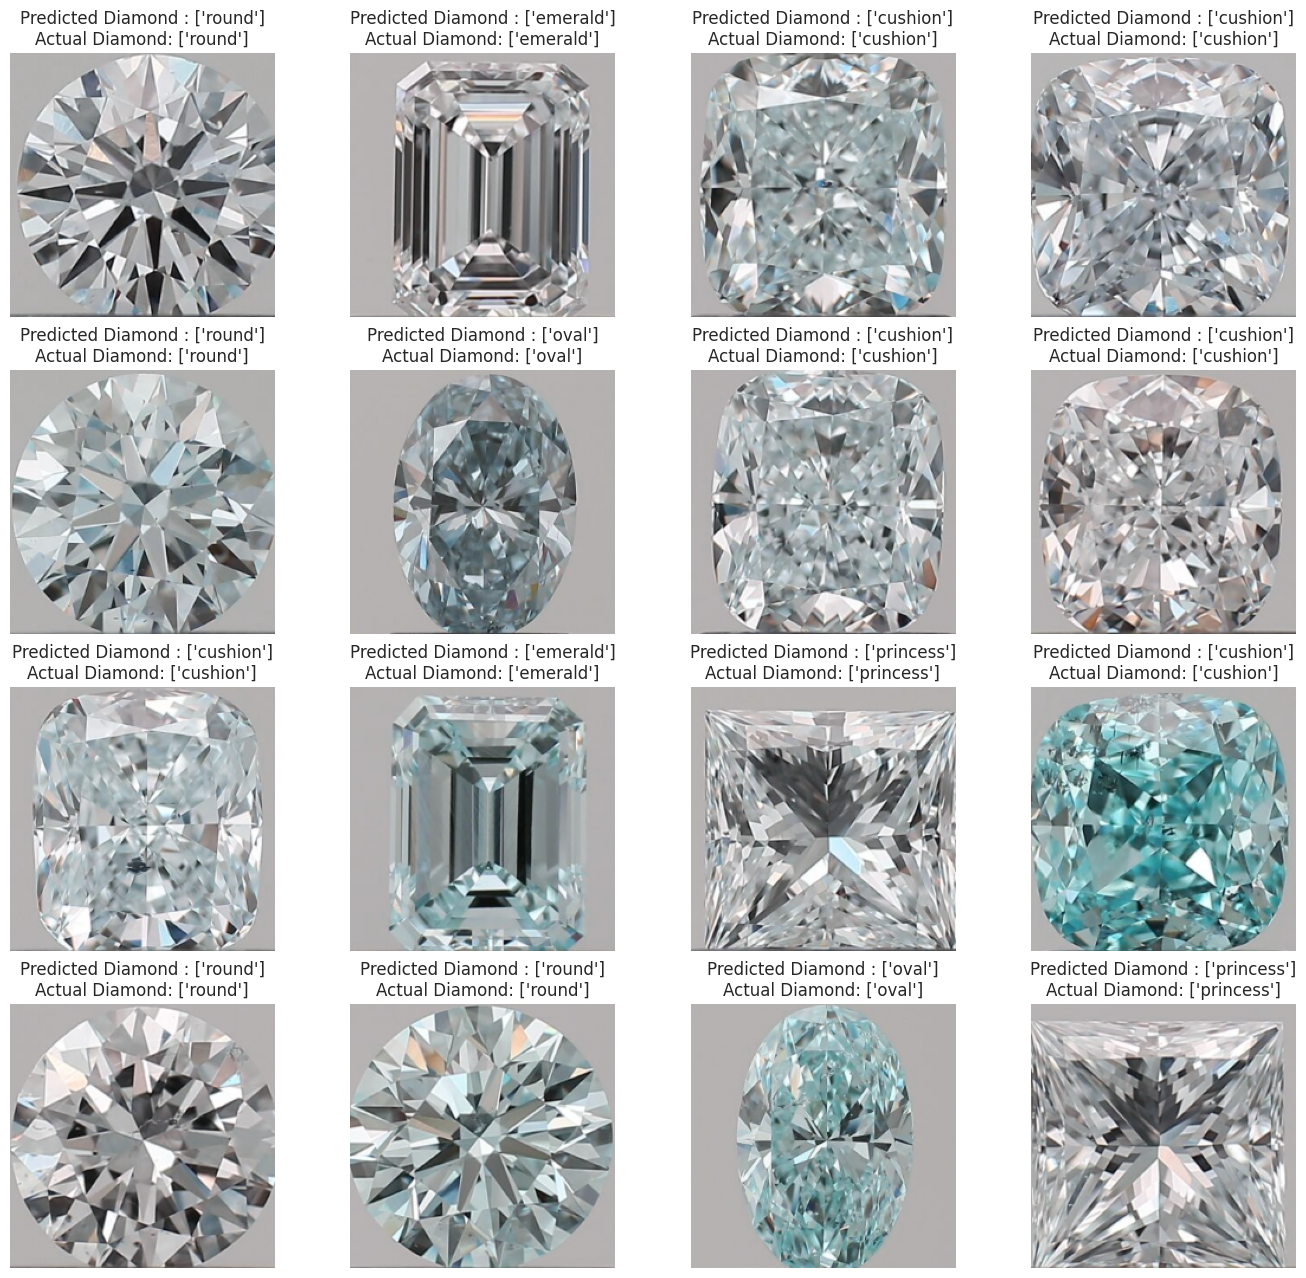

In [29]:
# figure out samples of this data with the true value and predicted ones
plt.figure(figsize=(15,15))
st = 10
for i in range(st,st+16):
    plt.subplot(4,4,i+1-st)
    plt.imshow(x_test[i])
    plt.title("Predicted Diamond : "+str(le.inverse_transform([Y_pred_classes[i]]))+"\n"+"Actual Diamond: "+str(le.inverse_transform([Y_true[i]])))
    plt.axis('off')

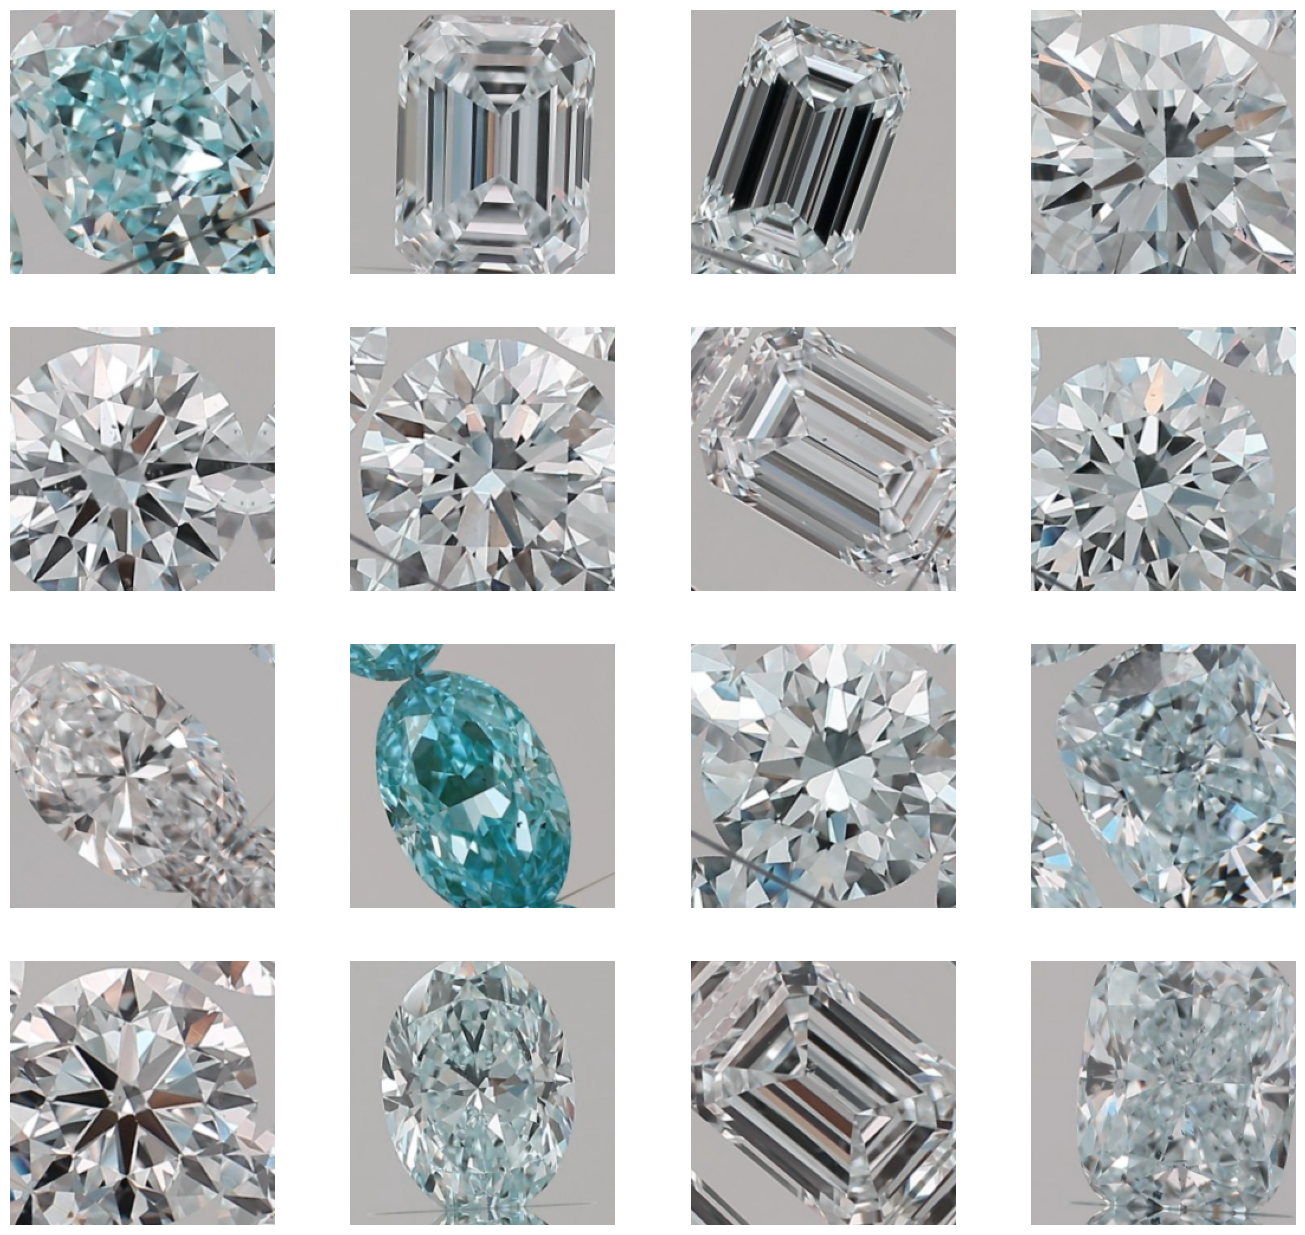

In [30]:
plt.figure(figsize=(15,15))    
for X, Y in datagen.flow(x_train, y_train, batch_size=32):
    for i in range(10, 10+16):
        plt.subplot(4,4,i+1-10)
        plt.imshow(X[i].reshape(224, 224, 3))
        plt.axis('off')    
    break
plt.show()